In [340]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn
import torch
import numpy as np

In [341]:
# form a tensor(multi-dimension matrix, which will sent to the model)
np.set_printoptions(precision=5)
a = [1,2,3]
b = np.array([4, 5, 6], dtype= np.int32)
t_a = torch.tensor(a)
t_b = torch.from_numpy(b)
print(t_b)
print(t_a)

tensor([4, 5, 6], dtype=torch.int32)
tensor([1, 2, 3])


In [342]:
t_ones = torch.ones((2,3),dtype = int)
t_ones.shape

torch.Size([2, 3])

In [343]:
print(t_ones)

tensor([[1, 1, 1],
        [1, 1, 1]])


In [344]:
# form a random tensor
rand_tensor = torch.rand(2,3)
print(rand_tensor)

tensor([[0.6826, 0.3051, 0.4635],
        [0.4550, 0.5725, 0.4980]])


# Manipulate torch type

In [345]:
# change torch dtype
t_a_new = t_a.to(torch.int64)
print(t_a.dtype)


torch.int64


In [346]:
t = torch.rand(2,3)

In [347]:
t = torch.rand(2,3)
t_tr = torch.transpose(t, 0, 1)
t_tr

tensor([[0.3398, 0.7718],
        [0.5239, 0.0112],
        [0.7981, 0.8100]])

In [348]:
# reshape a tensor (from 1 dimension to 2 dimension):
t = torch.zeros(30)
t_reshape = t.reshape(5,6)
t_reshape.shape

torch.Size([5, 6])

In [349]:
# remove the unnecessary dimensions
t = torch.zeros(1,2,1,4,1)
t_sqz = torch.squeeze(t, 4)
print(t_sqz.shape)

torch.Size([1, 2, 1, 4])


# Apply mathematical operations

In [350]:
torch.manual_seed(1)
t1 = 2 * torch.rand(5,2) - 1
t2 = torch.normal(mean = 0, std = 1, size = (5, 2))
t2

tensor([[ 0.8590,  0.7056],
        [-0.3406, -1.2720],
        [-1.1948,  0.0250],
        [-0.7627,  1.3969],
        [-0.3245,  0.2879]])

In [351]:
t3 = torch.multiply(t1, t2)
t3

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])

In [352]:
t4 = torch.mean(t1, axis = 0)
t4

tensor([-0.1373,  0.2028])

In [353]:
t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))
print(t5)

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])


In [354]:
# calculate the norm of a matrix
norm_t1 = torch.linalg.norm(t1, ord = 2, dim = 1)
print(norm_t1)

tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])


## Split , stack, and concatenate tensors

In [355]:
torch.manual_seed(1)
t = torch.rand(6)
print(t)
t_split = torch.chunk(t,chunks = 2)
[item.numpy() for item in t_split]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999])


[array([0.75763, 0.27931, 0.40307], dtype=float32),
 array([0.73468, 0.02928, 0.79986], dtype=float32)]

In [356]:
torch.manual_seed(2)
t = torch.rand(5)
t_split1 = torch.split(t,split_size_or_sections = (3,2))

[item.numpy() for item in t_split1]

[array([0.6147 , 0.38101, 0.63711], dtype=float32),
 array([0.47446, 0.71359], dtype=float32)]

In [357]:
A = torch.ones(3)
B = torch.zeros(3)
C = torch.cat([A, B], axis = 0)
print(C)


tensor([1., 1., 1., 0., 0., 0.])


In [358]:
A = torch.ones(3)
B = torch.zeros(3)
C = torch.stack([A, B], axis = 1)
C

tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])

# Builiding input piplines in PyTorch 

# Create a PyTorch Dataloader from existing tensors

In [359]:
from torch.utils.data import DataLoader
t = torch.arange(6, dtype = torch.float32)
data_loader = DataLoader(t)


In [360]:
for i in data_loader:
  print(i)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


In [361]:
# create a batch from this dataset 
data_loader = DataLoader(t, batch_size= 4, drop_last= False)
for i, j in enumerate(data_loader):
  print(f'batch{i}: {j}')
  

batch0: tensor([0., 1., 2., 3.])
batch1: tensor([4., 5.])


## Combining two tensors into a dataset

In [362]:
torch.manual_seed(1)
t_x = torch.rand([4,3], dtype = torch.float32)
t_y = torch.arange(4)

In [363]:
t_x

tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999],
        [0.3971, 0.7544, 0.5695],
        [0.4388, 0.6387, 0.5247]])

In [364]:
# set a Dataset class
from torch.utils.data import Dataset
class JointDataset():
  def __init__(self, x, y):
    self.x = x
    self.y = y
  
  def __len__(self):
    return len(self.x)
  
  def __getitem__(self, idx):
    return self.x[idx], self.y[idx]

In [365]:
joint_dataset = JointDataset(t_x, t_y)
# joint_dataset.__getitem__(3)

In [366]:
for example in joint_dataset:
  print('x: ', example[0], 'y: ', example[1])

x:  tensor([0.7576, 0.2793, 0.4031]) y:  tensor(0)
x:  tensor([0.7347, 0.0293, 0.7999]) y:  tensor(1)
x:  tensor([0.3971, 0.7544, 0.5695]) y:  tensor(2)
x:  tensor([0.4388, 0.6387, 0.5247]) y:  tensor(3)


In [415]:
# shuffle, batch, and repeat 
torch.manual_seed(1)
data_loader = DataLoader(dataset= joint_dataset, batch_size= 3, shuffle = True)

In [416]:
for i, batch in enumerate(data_loader, 0):
  print(f'batch{i}: ', 'x: ', batch[0], 'y: ', batch[1])

batch0:  x:  tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]]) y:  tensor([2, 0, 1])
batch1:  x:  tensor([[0.4388, 0.6387, 0.5247]]) y:  tensor([3])


In [417]:
# shuffle the dataset for twice
for epoch in range(2):
  print(f'epoch{epoch+1}')
  for i, batch in enumerate(data_loader,1):
    print(f'batch{i}, {batch[0]}, {batch[1]}')

epoch1
batch1, tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695],
        [0.7347, 0.0293, 0.7999]]), tensor([0, 2, 1])
batch2, tensor([[0.4388, 0.6387, 0.5247]]), tensor([3])
epoch2
batch1, tensor([[0.4388, 0.6387, 0.5247],
        [0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]), tensor([3, 2, 0])
batch2, tensor([[0.7347, 0.0293, 0.7999]]), tensor([1])


In [419]:
import pathlib
ime_path = pathlib.Path("C:/Users/julia/Desktop/Yanjun/dog and cat")
file_list = sorted([str(path) for path in ime_path.glob('*.jpg')])
file_list

['C:\\Users\\julia\\Desktop\\Yanjun\\dog and cat\\cat-05.jpg',
 'C:\\Users\\julia\\Desktop\\Yanjun\\dog and cat\\cat-06.jpg',
 'C:\\Users\\julia\\Desktop\\Yanjun\\dog and cat\\cat-4.jpg',
 'C:\\Users\\julia\\Desktop\\Yanjun\\dog and cat\\catanddog-07.jpg',
 'C:\\Users\\julia\\Desktop\\Yanjun\\dog and cat\\dog-01.jpg',
 'C:\\Users\\julia\\Desktop\\Yanjun\\dog and cat\\dog-02.jpg',
 'C:\\Users\\julia\\Desktop\\Yanjun\\dog and cat\\dog-03.jpg']

In [372]:
# visual the image using matplotlib
import matplotlib.pyplot as plt
import os
from PIL import Image

Image shape:  (3560, 5360, 3)
Image shape:  (3266, 4899, 3)
Image shape:  (2304, 3456, 3)
Image shape:  (5930, 3959, 3)
Image shape:  (802, 1024, 3)
Image shape:  (683, 1024, 3)
Image shape:  (683, 1024, 3)


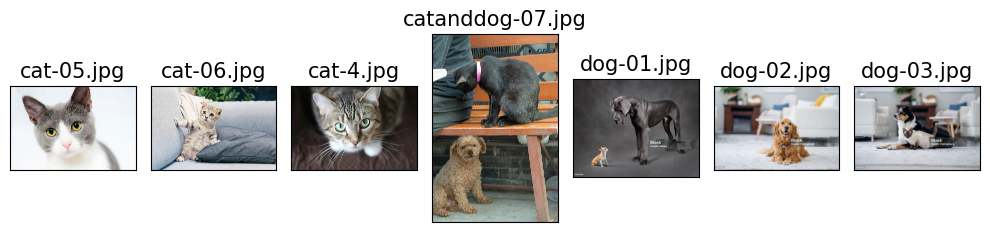

In [420]:
fig = plt.figure(figsize = (10, 10))
for i, file in enumerate(file_list):
  img = Image.open(file)
  print('Image shape: ', np.array(img).shape)
  ax = fig.add_subplot(1,7, i+1)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.imshow(img)  
  ax.set_title(os.path.basename(file), size = 15)
plt.tight_layout()
plt.show()

In [374]:
labels = ['dog' if 'dog' in os.path.basename(file) else 'cat' for file in file_list]
labels

['cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog']

In [375]:
# # build a joint Dataset (file_list and lables)
# class ImageDatase(Dataset):
#   def __init__(self, file_list, labels):
#     self.file_list = file_list
#     self.labels = labels

#   def __getitem__(self, index):
#     file = self.file_list[index]
#     label = self.labels[index]
#     return file, label
  
#   def __len__(self):
#     return len(self.file_list)
  

In [376]:
# image_dataset = ImageDatase(file_list, labels)
# for file, label in enumerate(image_dataset):
#   print(file, label)

0 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=5360x3560 at 0x13B07769CD0>, 'cat')
1 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4899x3266 at 0x13B0AFACA30>, 'cat')
2 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3456x2304 at 0x13B0AFBF220>, 'cat')
3 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3959x5930 at 0x13B07769CD0>, 'dog')
4 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x802 at 0x13B070130D0>, 'dog')
5 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x683 at 0x13B0AFBF220>, 'dog')
6 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x683 at 0x13B0AFACB20>, 'dog')


In [377]:
# use torchvision.transform to resize the images and convert the pixels to tensors
import torchvision.transforms as transforms
img_height, img_width = 80, 120
transform = transforms.Compose([transforms.Resize((img_height, img_width)), transforms.ToTensor()])

In [383]:
# update the class ImageDataset
class ImageDatase(Dataset):
  def __init__(self, file_list, labels, transform = None):
    self.file_list = file_list
    self.labels = labels
    self.transform = transform
  def __getitem__(self, index):
    img = Image.open(self.file_list[index])
    if self.transform is not None:
      img = self.transform(img).numpy().transpose(1,2,0)
    label = self.labels[index]
    return img, label
  
  def __len__(self):
    return len(self.file_list)

In [384]:
image_dataset = ImageDatase(file_list, labels, transform)

the shape of 0th image in file_list is :  (80, 120, 3) and the label is :  {'cat'}
the shape of 1th image in file_list is :  (80, 120, 3) and the label is :  {'cat'}
the shape of 2th image in file_list is :  (80, 120, 3) and the label is :  {'cat'}
the shape of 3th image in file_list is :  (80, 120, 3) and the label is :  {'dog'}
the shape of 4th image in file_list is :  (80, 120, 3) and the label is :  {'dog'}
the shape of 5th image in file_list is :  (80, 120, 3) and the label is :  {'dog'}
the shape of 6th image in file_list is :  (80, 120, 3) and the label is :  {'dog'}


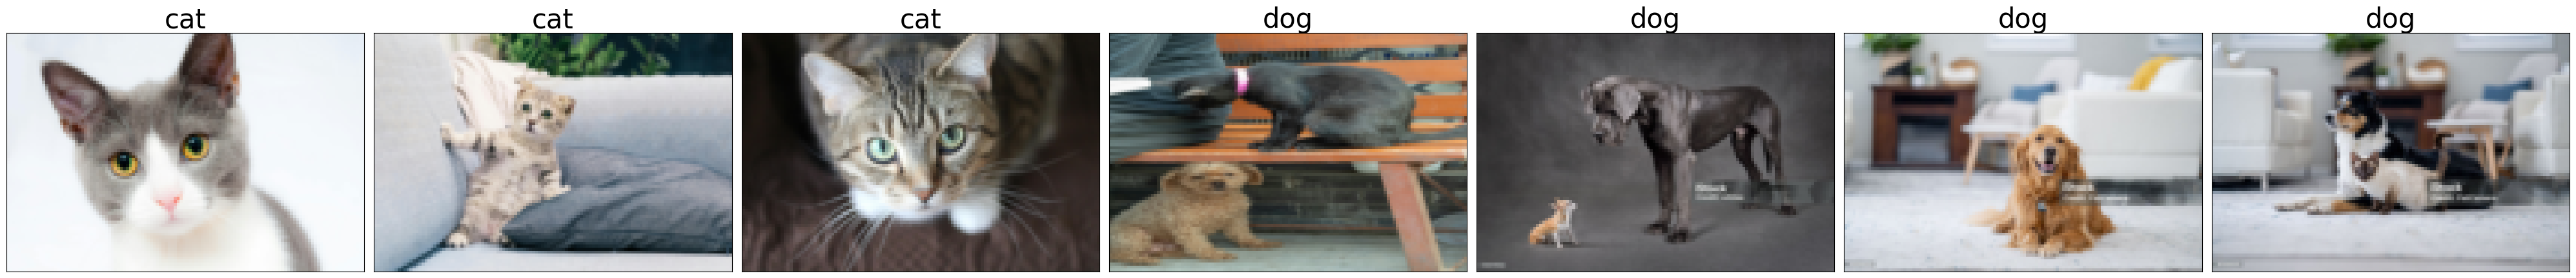

In [386]:
fig = plt.figure(figsize = (40, 60))
for i, example in enumerate(image_dataset):
  ax = fig.add_subplot(1,7, i+1)
  ax.set_xticks([])
  ax.set_yticks([])
  print(f'the shape of {i}th image in file_list is : ', np.array(example[0]).shape, 'and the label is : ', {example[1]})
  ax.imshow(example[0])
  ax.set_title(f'{example[1]}', size = 30)
plt.tight_layout()
plt.show()

epoch1:
batch1:  torch.Size([1, 80, 120, 3]) label is : ('cat',)
batch2:  torch.Size([1, 80, 120, 3]) label is : ('dog',)
batch3:  torch.Size([1, 80, 120, 3]) label is : ('cat',)
batch4:  torch.Size([1, 80, 120, 3]) label is : ('dog',)
batch5:  torch.Size([1, 80, 120, 3]) label is : ('cat',)
batch6:  torch.Size([1, 80, 120, 3]) label is : ('dog',)
batch7:  torch.Size([1, 80, 120, 3]) label is : ('dog',)


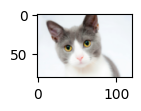

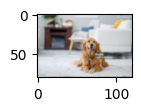

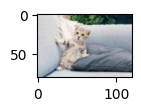

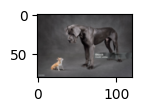

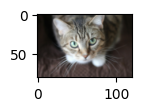

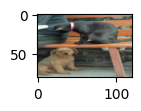

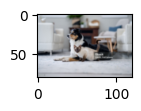

epoch2:
batch1:  torch.Size([1, 80, 120, 3]) label is : ('cat',)
batch2:  torch.Size([1, 80, 120, 3]) label is : ('cat',)
batch3:  torch.Size([1, 80, 120, 3]) label is : ('dog',)
batch4:  torch.Size([1, 80, 120, 3]) label is : ('dog',)
batch5:  torch.Size([1, 80, 120, 3]) label is : ('cat',)
batch6:  torch.Size([1, 80, 120, 3]) label is : ('dog',)
batch7:  torch.Size([1, 80, 120, 3]) label is : ('dog',)


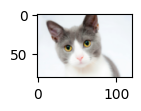

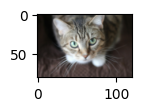

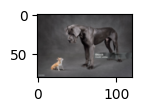

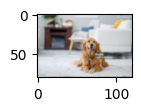

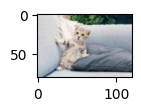

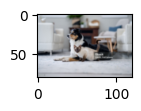

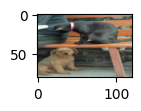

In [426]:
torch.manual_seed(1)  
data_loader1 = DataLoader(dataset = image_dataset, batch_size= 1, shuffle = True)
for epoch in range(2):
  print(f'epoch{epoch +1}:')
  for i, example in enumerate(data_loader1):
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(1,7, i+1)
    ax.imshow(example[0].reshape([80, 120, 3]))
    print(f'batch{i+1}: ', example[0].shape, f'label is : {example[1]}')
  plt.show()

# Human Face Feature

In [428]:
import torchvision

In [430]:
from re import split


image_path = "C:/Users/julia/Desktop/Yanjun/Data (Archive)/face"
celeba_dataset = torchvision.datasets.CelebA(image_path, split= 'train', target_type= 'attr', download= True)

Downloading...
From (original): https://drive.google.com/uc?id=0B7EVK8r0v71pZjFTYXZWM3FlRnM
From (redirected): https://drive.usercontent.google.com/download?id=0B7EVK8r0v71pZjFTYXZWM3FlRnM&confirm=t&uuid=5eb77846-50fc-4cbe-9270-1ac24c054e6d
To: C:\Users\julia\Desktop\Yanjun\Data (Archive)\face\celeba\img_align_celeba.zip
100%|██████████| 1.44G/1.44G [00:42<00:00, 34.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=0B7EVK8r0v71pblRyaVFSWGxPY0U
To: C:\Users\julia\Desktop\Yanjun\Data (Archive)\face\celeba\list_attr_celeba.txt
100%|██████████| 26.7M/26.7M [00:01<00:00, 25.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_ee_0u7vcNLOfNLegJRHmolfH5ICW-XS
To: C:\Users\julia\Desktop\Yanjun\Data (Archive)\face\celeba\identity_CelebA.txt
100%|██████████| 3.42M/3.42M [00:00<00:00, 20.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=0B7EVK8r0v71pbThiMVRxWXZ4dU0
To: C:\Users\julia\Desktop\Yanjun\Data (Archive)\face\celeba\list_bbox_celeba.txt
100%|██████████| 6.08M/6.

In [433]:
assert isinstance(celeba_dataset, torch.utils.data.Dataset)

In [484]:
example = next(iter(celeba_dataset))
print(example)

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218 at 0x13B141DE130>, tensor([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1]))


In [473]:
# smile function
def smile(a):
  b = 'smile' if a == 1 else 'not smile'
  return b

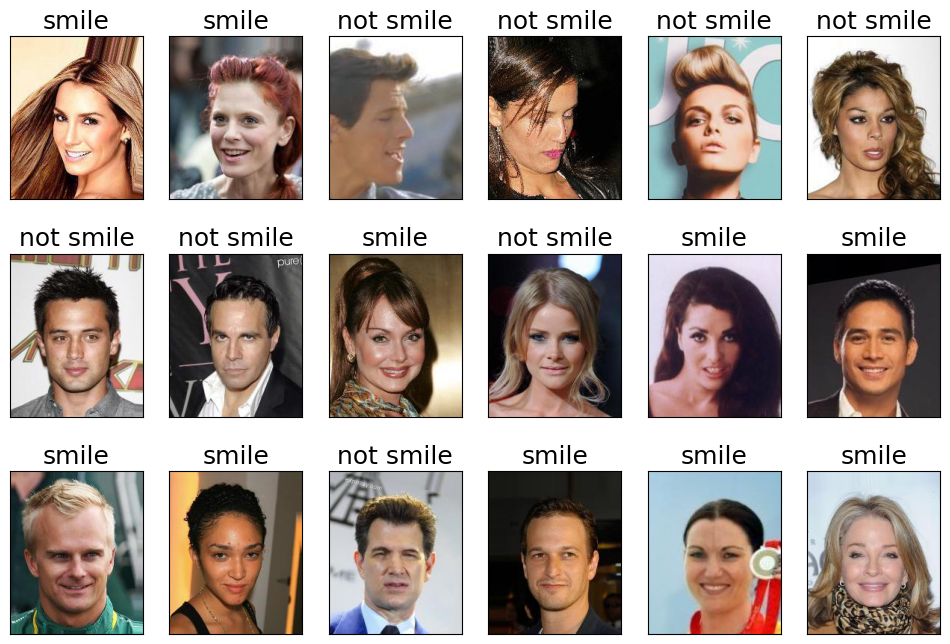

In [474]:
from itertools import islice
fig = plt.figure(figsize = (12, 8))
for i, (iamge, attributes) in islice(enumerate(celeba_dataset),0,18):
  ax= fig.add_subplot(3, 6, i+1)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.imshow(iamge)
  ax.set_title(f'{smile(attributes[31])}', size = 18)
plt.show() 

# MNIST

In [475]:
image_path1 = "C:/Users/julia/Desktop/Yanjun/Data (Archive)/MNIST"
mnist_dataset = torchvision.datasets.MNIST(image_path1, 'train',download= True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting C:/Users/julia/Desktop/Yanjun/Data (Archive)/MNIST\MNIST\raw\train-images-idx3-ubyte.gz to C:/Users/julia/Desktop/Yanjun/Data (Archive)/MNIST\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting C:/Users/julia/Desktop/Yanjun/Data (Archive)/MNIST\MNIST\raw\train-labels-idx1-ubyte.gz to C:/Users/julia/Desktop/Yanjun/Data (Archive)/MNIST\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting C:/Users/julia/Desktop/Yanjun/Data (Archive)/MNIST\MNIST\raw\t10k-images-idx3-ubyte.gz to C:/Users/julia/Desktop/Yanjun/Data (Archive)/MNIST\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting C:/Users/julia/Desktop/Yanjun/Data (Archive)/MNIST\MNIST\raw\t10k-labels-idx1-ubyte.gz to C:/Users/julia/Desktop/Yanjun/Data (Archive)/MNIST\MNIST\raw



In [497]:
assert isinstance(mnist_dataset, torch.utils.data.Dataset)
example = next(iter(mnist_dataset))
print(example)

(<PIL.Image.Image image mode=L size=28x28 at 0x13B10447FD0>, 5)


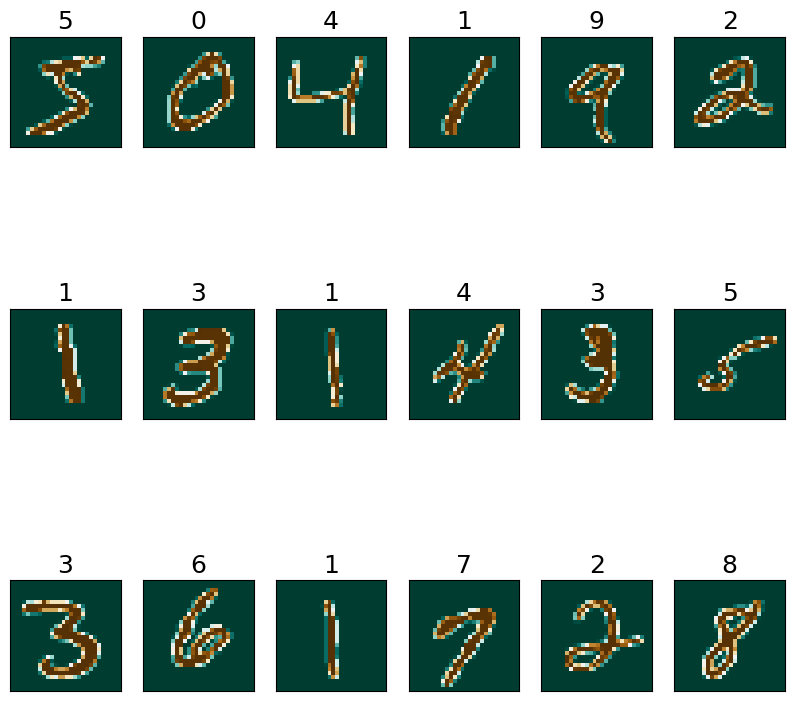

In [507]:
fig = plt.figure(figsize = (10, 10))
for i, (image, label) in islice(enumerate(mnist_dataset), 18):
  ax = fig.add_subplot(3, 6, i+1)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.imshow(image, cmap = 'BrBG_r')
  ax.set_title(label, size = 18)
plt.show()

# Building a linear regression model

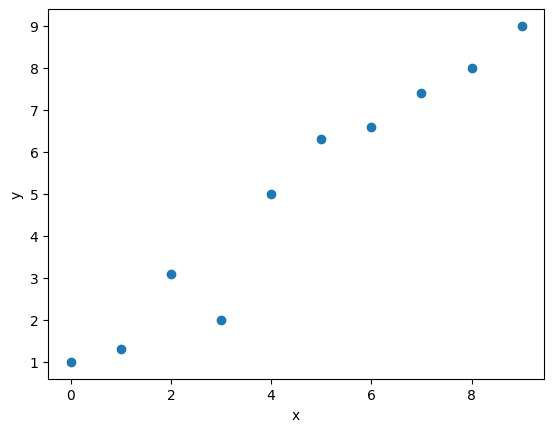

In [530]:
X_train = np.arange(10, dtype = 'float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0], dtype = 'float32')
plt.plot(X_train, y_train, 'o', markersize = 6)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [531]:
# building a tensor for x_train_norm and y_train
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset
norm = StandardScaler()
X_train_norm = norm.fit_transform(X_train)
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train)

In [533]:
# build the tensor for train dataset, and also going to use batch stochastic
train_ds = TensorDataset(X_train_norm, y_train)
batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle = True)

In [535]:
torch.manual_seed(1)
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad = True)